In [1]:
%matplotlib inline
from __future__ import (absolute_import, unicode_literals, division,
                        print_function)
from srttools.core.calibration import *
import numpy as np



# Preliminaries

In [2]:
# First things first: here's the list of calibrators
calist

['3C147', '3C48', '3C123', '3C295', '3C286', 'NGC7027']

In [3]:
# Their fluxes
fluxlist

array([  5.1885,   3.6722,  11.0837,   4.161 ,   5.7194,   5.6107])

In [4]:
# I also assume a 5% error on fluxes.
efluxlist

array([ 0.259425,  0.18361 ,  0.554185,  0.20805 ,  0.28597 ,  0.280535])

# Rapid calibration: Total power 

In the following, I will assume that all fits went perfectly. 
This is not the case, calibrators are not all very reliable, etc.
But still, it is good for first-order calibration.

In [5]:
# read config file
config_file_tp = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib.ini'))


Get the full table of scans, each fit with a linear + Gaussian function. 
If a source is in the calibrator list, the conversion between flux and counts is done automatically. 

In [6]:
full_table_tp = get_full_table(config_file_tp, channel='Ch0')


Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124434-scicom-3C48_001_003.hdf5
Saving to /Users/meo/devel/spyder_projects/srt-single-dish-tools/TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124434-scicom-3C48_001_003.hdf5
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124452-scicom-3C48_001_004.hdf5
Saving to /Users/meo/devel/spyder_projects/srt-single-dish-tools/TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124452-scicom-3C48_001_004.hdf5
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124511-scicom-3C48_001_005.hdf5
Saving to /Users/meo/devel/spyder_projects/srt-single-dish-tools/TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124511-scicom-3C48_001_005.hdf5
Loading file ../../TEST_DATASET/20150624/tp/20150624-124434-scicom-3C48/20150624-124528-scicom-3C48_001_006.hdf5
Saving to /Users/meo/devel/spyder_projects/srt-single-dish-tools/TEST_D

Here's the table as it is now. Notice the Flux = $1\pm0$ in Sources, and the correct values for calibrators



In [7]:
full_table_tp

Dir,File,Source,Time,Counts,Counts Err,Flux,Flux Err,Kind,Elevation,Flux/Counts,Flux/Counts Err
str6400,str6400,str6400,float128,float64,float64,float64,float64,str6400,float64,float64,float64
20150624/tp/20150624-135222-scicom-3C147,20150624-135222-scicom-3C147_003_003.fits,3C147,57197.5780753,77.0722737418,0.146339587218,5.1885,0.259425,Calibrator,57.6930202245,0.0673199290497,0.00349381895142
20150624/tp/20150624-135222-scicom-3C147,20150624-135239-scicom-3C147_003_004.fits,3C147,57197.5782796,77.5146242181,0.187224884249,5.1885,0.259425,Calibrator,57.6442699099,0.0669357563471,0.00350846104174
20150624/tp/20150624-135222-scicom-3C147,20150624-135259-scicom-3C147_003_005.fits,3C147,57197.578502,75.4054838179,0.177024853891,5.1885,0.259425,Calibrator,57.5707417814,0.0688079929641,0.00360193597533
20150624/tp/20150624-135222-scicom-3C147,20150624-135318-scicom-3C147_003_006.fits,3C147,57197.5787306,75.2514481794,0.178202769654,5.1885,0.259425,Calibrator,57.5455564013,0.0689488391988,0.00361071953674
20150624/tp/20150624-132712-scicom-3C286,20150624-132712-scicom-3C286_004_003.fits,3C286,57197.5606072,78.6132102026,0.206385984659,5.7194,0.28597,Calibrator,26.3020131515,0.0727536756896,0.00382868653015
20150624/tp/20150624-132712-scicom-3C286,20150624-132730-scicom-3C286_004_004.fits,3C286,57197.5608057,78.2419789308,0.299625605601,5.7194,0.28597,Calibrator,26.3761184749,0.0730988668507,0.00393487353536
20150624/tp/20150624-132712-scicom-3C286,20150624-132747-scicom-3C286_004_005.fits,3C286,57197.5610117,77.2755742058,0.220093705493,5.7194,0.28597,Calibrator,26.4271574198,0.0740130378684,0.00391145335205
20150624/tp/20150624-132712-scicom-3C286,20150624-132805-scicom-3C286_004_006.fits,3C286,57197.5612096,77.3161312814,0.242733009238,5.7194,0.28597,Calibrator,26.4532130676,0.0739742134689,0.00393095177428
20150624/tp/20150624-141441-scicom-3C147,20150624-141441-scicom-3C147_003_003.fits,3C147,57197.5935818,76.274608535,0.178992661732,5.1885,0.259425,Calibrator,54.0834013541,0.0680239479383,0.0035608283375


To select the calibrator and the source data from the table, it is sufficient to do

In [8]:
calibrator_table_tp = full_table_tp[full_table_tp["Kind"] == "Calibrator"]

# Similarly for the source table
source_table_tp = full_table_tp[full_table_tp["Kind"] == "Source"]


To obtain the mean calibration values and their errors (Jansky/Counts)

In [9]:
fc = np.mean(calibrator_table_tp["Flux/Counts"])
fce = np.sqrt(np.sum(calibrator_table_tp["Flux/Counts Err"] ** 2))\
    / len(calibrator_table_tp)

Then, the calibrated source flux can be obtained through

In [10]:
source_table_tp["Flux"] = source_table_tp["Counts"] * fc
source_table_tp["Flux Err"] = \
    (source_table_tp["Counts Err"] / source_table_tp["Counts"] + fce / fc) * \
    source_table_tp["Flux"]

Let's look at 3C279 data

In [11]:
filtered = source_table_tp[source_table_tp["Source"] == "3C279"]
print(filtered[("Source", "Counts", "Counts Err", "Flux", "Flux Err")])

Source     Counts      Counts Err        Flux        Flux Err   
------ ------------- -------------- ------------- --------------
 3C279   259.8792814  8.42973510805 18.9042046465 0.715050379933
 3C279 272.722675063  11.2013569777 19.8384620481 0.921698012008
 3C279 259.224171227  2.19641005491  18.856550456 0.261367514669
 3C279 363.374319304  30.0337314606 26.4326669614  2.32713576459
 3C279  264.04185772  6.51269296963 19.2069998297 0.577231820044
 3C279 1092.83019064   47.038847269 79.4949310942  3.85001613511
 3C279 348.915036884  9.92934072086 25.3808661697 0.859030157595
 3C279 335.947825198  5.54063456163 24.4376019661 0.534703642673
 3C279 356.977767046  4.51296348579 25.9673673336 0.468190632669
 3C279 282.283192322   2.6758163673  20.533915621 0.305277951665
   ...           ...            ...           ...            ...
 3C279 277.292299844  2.65289392551 20.1708668537 0.301654480229
 3C279 263.493085647 0.932953180591 19.1670809122 0.171133896202
 3C279 252.592593461 0.99

If we want to play it fancy, we can obtain a histogram of the calibrated fluxes, finding possible outliers.

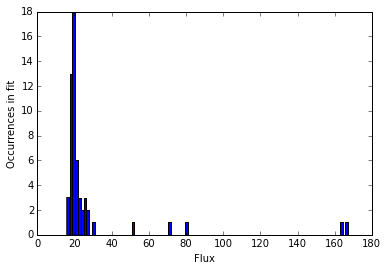

In [12]:
_ = plt.hist(filtered["Flux"], bins=100)
plt.xlabel("Flux")
plt.ylabel("Occurrences in fit")

The function `show_calibration` plots this and the calibrator data.

Source      Flux        Flux Err        Counts      Counts Err  
------ ------------- -------------- ------------- --------------
 3C279 18.9042046465 0.715050379933   259.8792814  8.42973510805
 3C279 19.8384620481 0.921698012008 272.722675063  11.2013569777
 3C279  18.856550456 0.261367514669 259.224171227  2.19641005491
 3C279 26.4326669614  2.32713576459 363.374319304  30.0337314606
 3C279 19.2069998297 0.577231820044  264.04185772  6.51269296963
 3C279 79.4949310942  3.85001613511 1092.83019064   47.038847269
 3C279 25.3808661697 0.859030157595 348.915036884  9.92934072086
 3C279 24.4376019661 0.534703642673 335.947825198  5.54063456163
 3C279 25.9673673336 0.468190632669 356.977767046  4.51296348579
 3C279  20.533915621 0.305277951665 282.283192322   2.6758163673
   ...           ...            ...           ...            ...
 3C279 20.1708668537 0.301654480229 277.292299844  2.65289392551
 3C279 19.1670809122 0.171133896202 263.493085647 0.932953180591
 3C279  18.374154543 0.17

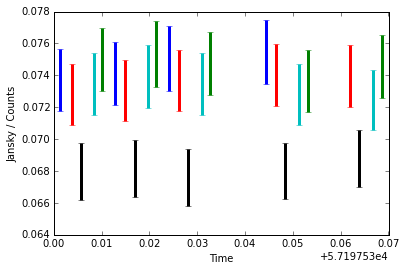

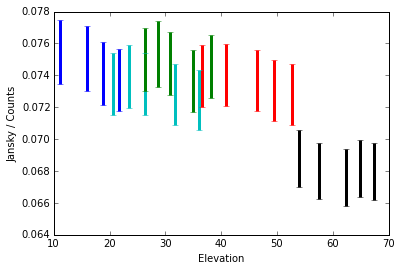

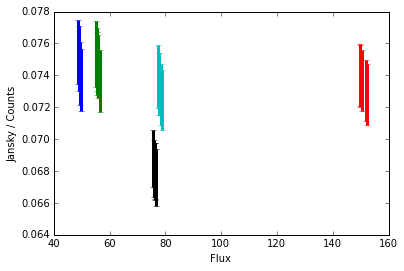

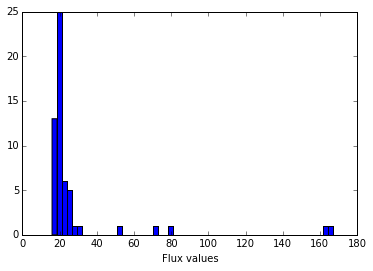

In [13]:
show_calibration(full_table_tp)

Notice that one calibrator, in black, is consistently below the Jansky/Counts ratio of the others. It turns out that 3C147 is not as reliable as the others.

Let's see if results with Channel 1 are consistent.

In [14]:
%%capture shutup
full_table_tp1 = get_full_table(config_file_tp, channel='Ch1')

# ----- This time I captured the output of the function above, full of "loading file..." 
# and "saving to file...", not very informative

Source      Flux        Flux Err        Counts      Counts Err  
------ ------------- -------------- ------------- --------------
 3C279 19.6096675961 0.152303355558 314.479396456 0.742228700582
 3C279 20.1287020092 0.147812479323 322.803129031  0.62520590043
 3C279 19.0615759046 0.162371423413 305.689673555 0.951212090564
 3C279   20.35548767 0.198948206055 326.440080927  1.42560393123
 3C279 20.5181923962 0.196662371555 329.049369628  1.37483880957
 3C279 19.7151102182 0.231831834226 316.170375255  2.00848110623
 3C279 20.1091951788 0.183373144864  322.49029883  1.19718210256
 3C279 20.7417184838 0.192861540191 332.634047889  1.29450424011
 3C279 21.2147774938  0.16933945641   340.2204749 0.876265073798
 3C279 19.1435925377 0.158971392233 307.004970775  0.88957469519
   ...           ...            ...           ...            ...
 3C279 19.1559378646 0.171495240906 307.202952252  1.08934871816
 3C279 19.9567884444 0.157546361071 320.046158581 0.796213486863
 3C279 20.0050250688 0.15

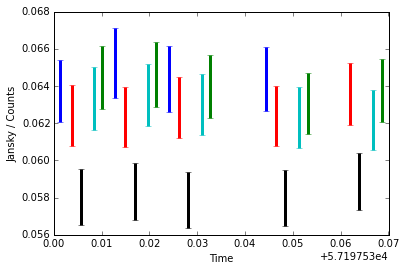

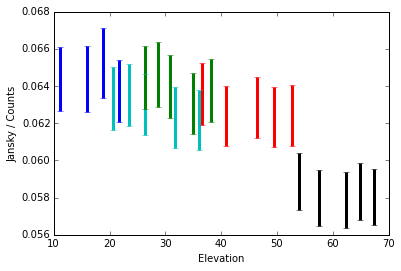

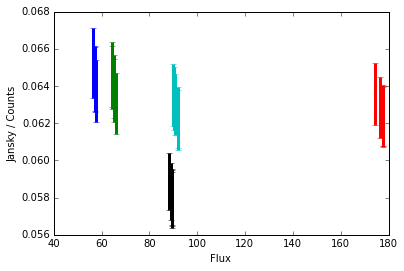

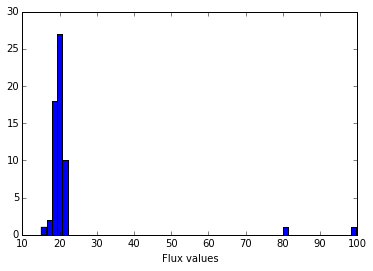

In [15]:
show_calibration(full_table_tp1)

Results for Channel 1 are largely consistent. Encouraging!

# And the Roach 2 data?

In [16]:
config_file_r2 = \
    os.path.abspath(os.path.join('/Users/meo/devel/spyder_projects/srt-single-dish-tools',
                                     'TEST_DATASET',
                                     'test_calib_roach.ini'))



In [17]:
%%capture shutup
full_table_r2 = get_full_table(config_file_r2, channel='Ch0')

Source      Flux        Flux Err        Counts      Counts Err 
------ ------------- -------------- ------------- -------------
 3C279 16.1118368369 0.144512117024  5231590.4126 17185.2866756
 3C279  15.825607866 0.150054361135 5138650.49796 19513.1881079
 3C279 14.4769679634 0.158295113046 4700740.67702 24678.2572107
 3C279 14.6278859427 0.161760204565 4749744.46606 25524.8315119
 3C279 12.1228917365  1.43811366237   3936360.877 444586.501646
 3C279 15.6558466812 0.464232261126 5083528.23004 121841.590955
 3C279  18.095855355 0.391646217832 5875810.70621 93768.8999186
 3C279 19.6490650153 0.345104503861 6380145.30502   75789.73995
 3C279 19.2380912374 0.385776170668 6246700.15547 89754.5810347
 3C279 14.8139982749 0.359236397754  4810176.0297 89302.7775022
   ...           ...            ...           ...           ...
 3C279 81.4525068063  23.8972627294  26448018.187 7609214.10785
 3C279 13.7891943004  1.22566399357 4477417.28205 372527.494253
 3C279 77.1526827785  11.1779597506 2505

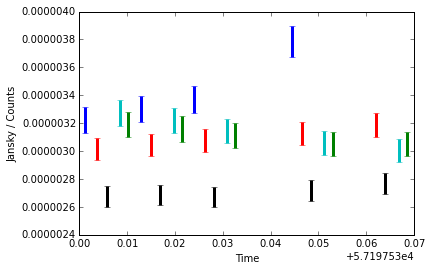

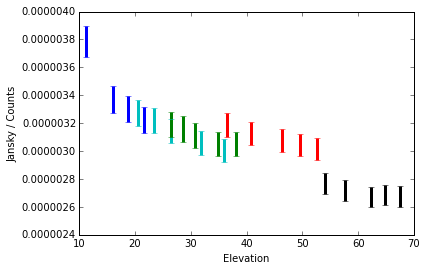

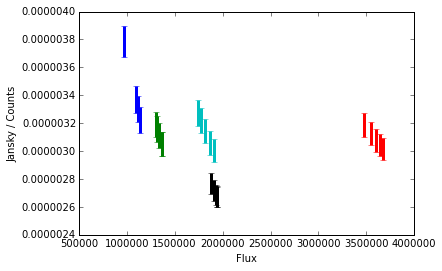

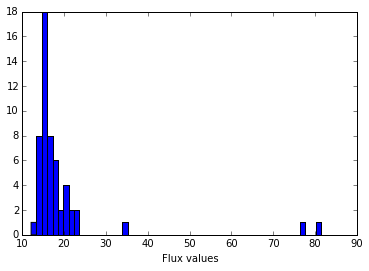

In [18]:
show_calibration(full_table_r2)

In [19]:
%%capture shutup
full_table_r21 = get_full_table(config_file_r2, channel='Ch1')

Source      Flux        Flux Err        Counts      Counts Err 
------ ------------- -------------- ------------- -------------
 3C279  15.706775808 0.433323991526  4184191.3961 91528.4843272
 3C279 15.8024686934 0.540304878691 4209683.41004 119881.905589
 3C279 13.9998977924 0.786404678435 3729489.27301 188185.021105
 3C279 17.0439385812 0.838019897897 4540403.58373 197301.836208
 3C279  17.770067338 0.179071461265 4733839.95372  20656.701116
 3C279 18.1441976349 0.171156839283 4833506.03342 17978.8493295
 3C279 17.2606510561 0.171923494749  4598134.4945 19527.8807183
 3C279 17.8781846007 0.178507742168 4762641.74766 20341.9702134
 3C279 19.2445716282  0.19312071887 5126639.10231 22155.0755091
 3C279 18.8637371216 0.206739248821 5025187.06114 26362.6184774
   ...           ...            ...           ...           ...
 3C279 17.6583083828 0.174382909165 4704068.03462 19577.8011227
 3C279 18.2421883428 0.193381979136 4859610.17354 23750.3476199
 3C279 18.8654539608 0.190575518681 5025

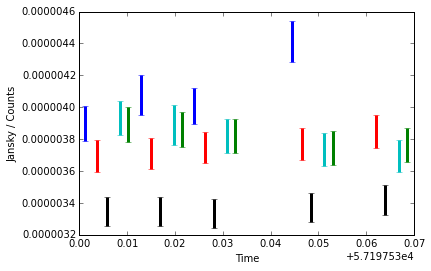

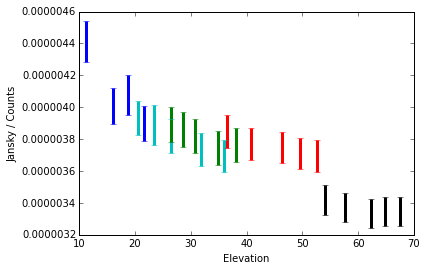

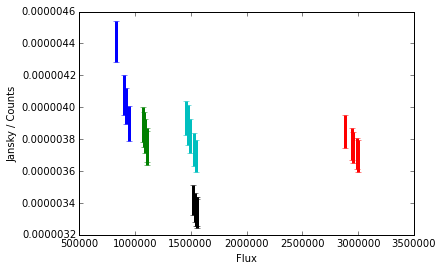

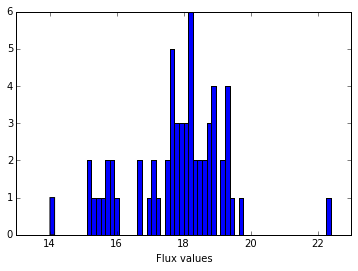

In [20]:
show_calibration(full_table_r21)

Notice that for Roach 2 data the results are largely consistent. But:

* Error bars of calibrators are lower
    
* Flux values for the source are lower

* Conversion factors for calibrators show a strong dependence on elevation and / or flux

These things are worth further investigation.